# Neural Networks - A Practical Introduction
by _Minho Menezes_  

---

## Neural Networks - Representation

In this first notebook, we build the structure necessary for a Neural Network to be represented, as well as the methods that it can perform with data.

* [1. The Single Layer Perceptron](#1.-The-Single-Layer-Perceptron)  
* [2. Classification Using a SLP](#2.-Classification-Using-a-SLP)  
* [3. The Multilayer Perceptron](#3.-The-Multilayer-Perceptron)  
* [4. Classification Using a MLP](#4.-Classification-Using-a-MLP)  
* [5. Multiclass Classification Using a MLP](#5.-Multiclass-Classification-Using-a-MLP)  

---
### Libraries

In [1]:
## LIBRARIES ##
import numpy as np                         # Library for Numerical and Matricial Operations
import matplotlib.pyplot as plt            # Library for Generating Visualizations
from mpl_toolkits.mplot3d import Axes3D    # Library for Generating 3D Visualizations
import pandas as pd                        # Library for Handling Datasets
from tools import Tools as tl              # Library for some Utilitary Tools

### Neural Network Class

In [2]:
## CLASS: Multilayer Perceptron ##
class MultilayerPerceptron(object):
    
    # CLASS CONSTRUCTOR
    def __init__(self, n_neurons=[2, 5, 1]):
        # Verify the architecture specified
        if(len(n_neurons) < 2):
            raise ValueError("The network must have at least two layers! (The input and the output layers)")
        
        # Network Architecture Variables
        self.hidden_layers = len(n_neurons)-2
        self.n_neurons = n_neurons
        self.W = []
        
        # Adjusts the Network architecture
        for i in range(1, len(n_neurons)):
            self.W.append( np.random.randn(self.n_neurons[i-1]+1 , self.n_neurons[i]) )
        
    # ACTIVATION FUNCTION
    def activate(self,Z):
        pass
    
    # FORWARD PROPAGATION
    def forward(self, X):
        pass
    
    # CLASSIFICATION PREDICTION
    def predict(self, X):
        pass
        
## ---------------------------- ##

----
## 1. The Single-Layer Perceptron

The **Single-Layer Perceptron**, also known by the alias of Logistic Units, are the fundamental component of most of the connected Neural Networks that we study, so they are refered as to the _neurons_ of such Networks. This is a graphic representation of a Single-Layer Perceptron neuron:

<img src="../imgs/slp_01.png" alt="singlelayer perceptron neuron" width="350px"/>

We have seen that the output of such neuron is calculated as:

$$
    \hat{y} = \varphi \left(S_{i_\text{net}} \right) = \varphi \left( W_0 + \sum_i W_i X_i \right)
$$

Where $S_{i_\text{net}} = W_0 + \sum_i W_i X_i$ is the **net potential** of a sample $j$.  

If we include, for each sample, a feature $X_0 = 1$, then this operation can be summarized as:

$$
    \hat{\mathbf{y}} = \varphi \left(\mathbf{W}^T \mathbf{X} \right)
$$


Write codes for the _activate()_ and _forward()_ methods of such neuron in below:

In [3]:
# ACTIVATION FUNCTION
def activate(self, Z):
    return 1 / (1 + np.exp(-Z))

# FORWARD PROPAGATION
def forward(self, X):
    X = np.vstack([np.ones([1, X.shape[1]]), X])  # Add the feature X_0 = 1 for all samples 
    Z = np.matmul(self.W[0].T, X)                 # Calculates the net potential of each sample (matrix form)
    A = self.activate(Z)                          # Perform the activation function over all net potentials.
    
    return A                                      # Return the activation matrix 

# Updates the methods directly in the MLP class
MultilayerPerceptron.activate = activate
MultilayerPerceptron.forward = forward


Create a simple Neural Network to try to classify the examples from the matrix $X$:

In [4]:
# Creates a artificial toy dataset (Rows -> Attributes; Columns --> Samples)
X = np.array([[  1, 0,  5, -7],
              [ -2, 9, -1, -4]])

# Creates the Neural Network with 2 Input Neurons and 1 Output Neuron
# (The weights are randomnly initiated)
brain = MultilayerPerceptron(n_neurons=[2,1])

# Computes the output for each sample in the matrix X
A = brain.forward(X)

# Show the results
print("## RESULTS ##")
print("Input Layer:\n", X)
print("\nOutput Layer:\n", A)
print()

print("The network says...")
for i,otp in enumerate(A[0]):
    print("  I am {0:.2f}% sure that Sample {1} belongs to the class.".format(otp*100, i+1))

## Results ##
Input Layer:
 [[ 1  0  5 -7]
 [-2  9 -1 -4]]

Output Layer:
 [[9.74541419e-01 3.51635974e-04 9.97132612e-01 3.16863864e-01]]

The network says...
  I am 97.45% sure that Sample 1 belongs to the class.
  I am 0.04% sure that Sample 2 belongs to the class.
  I am 99.71% sure that Sample 3 belongs to the class.
  I am 31.69% sure that Sample 4 belongs to the class.


### 2. Classification Using a SLP

Once that a Neural Network architecture is built, and the method of forwarding is well-implemented, we can use this network to try to classify samples from real datasets.

**Consider the Artificial Dataset below, where the color indicates the correct class of each sample**:

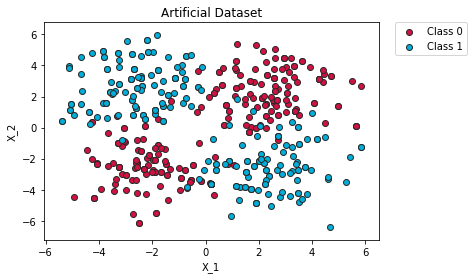

In [5]:
# Loads and Plot the Data
X_train, X_test, y_train, y_test = tl.loadData("../data/toy_data_01.csv")
tl.plotData(X_train, y_train)

We can implement a method of inference to use the information of the output signal (from the forward stage) to classify the samples. For this, we just need to "clip" the output in the following way:

$$
    \hat{\mathbf{y}} = 
    \begin{cases}
     1 & \text{if }\  \hat{\mathbf{y}}_\text{forward} \ge 0.5 \\
     0 & \text{otherwise}
    \end{cases}
$$

Implement below the method that clips all the output from the forward stage and return the prediction of the class:

In [6]:
# CLASSIFICATION PREDICTION
def predict(self, X):
    A = self.forward(X)
    return (A > 0.5).astype(int)

# Updates the methods directly in the MLP class
MultilayerPerceptron.predict = predict

We can now predict all the samples from the artificial dataset using a Neural Network and visualize the results (compare it to the data visualization using the real outputs shown above):

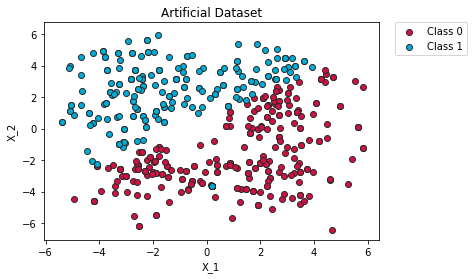

In [7]:
# Creates the Neural Network with 2 Input Neurons and 1 Output Neuron
# (The weights are randomnly initiated)
brain = MultilayerPerceptron(n_neurons=[2,1])

# Predicts each sample in the dataset
y_hat = brain.predict(X_train)

# Plot the data using the Network's prediction to color the points
tl.plotData(X_train, y_hat)

We can also classify the entire dataset space in order to visualize the behaviour of the network, and the **decision boundary**:

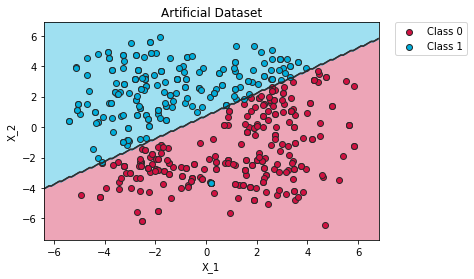

In [8]:
# Classify and plot the results for the entire dataset space
tl.plotClassContour(X_train, y_hat, brain)

## 3. The Multilayer Perceptron

The Singlelayer Perceptron can be useful in some situations, but it is restricted to linearly separable problems.  
The **Multilayer Perceptron** is an evolution of such architecture that solves this problem by adding intermediary layers (known as _hidden layers_), that adds non-linearity to the network inference process. This is a graphic representation of a Multilayer Perceptron with only one hidden layer:

<img src="../imgs/mlp_01.png" alt="binary multilayer perceptron" width="350px"/>

The forward process of the MLP, using the matrix operations, is very simple. All we need to do is to have a list of weights matrices $\mathbf{W}^{(l)}$ for transition to layer $l-1$ to $l$, and perform matrix multiplications in the order of the layers:

$$
    \mathbf{A}^{(i)} = \varphi \left(\mathbf{W}^{(i)T} \mathbf{A}^{(i-1)} \right)
$$

Update the _forward()_ method to account for the multilayer architecture:

In [9]:
def forward(self, X):
        # Activation List
        A = []
        
        # Input Layer Activation
        A.append( np.vstack([np.ones([1, X.shape[1]]), X]) )
        
        # Hidden Layer Activation
        for i in range(0, self.hidden_layers):
            Z = np.matmul(self.W[i].T, A[-1])
            Z = self.activate(Z)
            
            A.append( np.vstack([np.ones([1, Z.shape[1]]), Z]) )
        
        # Output Layer Activation
        Z = np.matmul(self.W[-1].T, A[-1])
        Z = self.activate(Z)

        A.append(Z)
        
        return A
    

# Updates the methods directly in the MLP class
MultilayerPerceptron.forward = forward

Create a Neural Network with multiple layers to try to classify the examples from the matrix $X$:

In [10]:
# Creates a artificial toy dataset (Rows -> Attributes; Columns --> Samples)
X = np.array([[  1, 0,  5, -7],
              [ -2, 9, -1, -4]])

# Creates the Neural Network with 2 Input Neurons, 5 Hidden Neurons and 1 Output Neuron
# (The weights are randomnly initiated)
brain = MultilayerPerceptron(n_neurons=[2,5,1])

# Computes the output for each sample in the matrix X
A = brain.forward(X)

# Show the results
print("## RESULTS ##")
print("Input Layer:\n", A[0])
print("\nHidden Layer:\n", A[1])
print("\nOutput Layer:\n", A[2])
print()

print("The network says...")
for i,otp in enumerate(A[-1][0]):
    print("  I am {0:.2f}% sure that Sample {1} belongs to the class.".format(otp*100, i+1))

## Results ##
Input Layer:
 [[ 1.  1.  1.  1.]
 [ 1.  0.  5. -7.]
 [-2.  9. -1. -4.]]

Hidden Layer:
 [[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [8.80151748e-01 2.97685606e-03 6.99624794e-02 9.99985713e-01]
 [4.36605337e-01 1.86661994e-01 3.26702847e-01 6.64055401e-01]
 [3.06694937e-02 9.84603472e-01 3.35576904e-05 9.99964446e-01]
 [4.45592058e-01 4.97453261e-01 2.45224385e-01 8.31038184e-01]
 [2.55231378e-01 1.35302917e-01 3.93990653e-03 9.99611408e-01]]

Output Layer:
 [[0.78174235 0.83893926 0.74638917 0.81412205]]

The network says...
  I am 78.17% sure that Sample 1 belongs to the class.
  I am 83.89% sure that Sample 2 belongs to the class.
  I am 74.64% sure that Sample 3 belongs to the class.
  I am 81.41% sure that Sample 4 belongs to the class.


### 4. Classification Using a MLP
Once that a Neural Network architecture is built, and the method of forwarding is well-implemented, we can use this network to try to classify samples from real datasets. **We will use the same dataset as before**.

Start by updating the _predict()_ method to only return the "clipped" results from the activations in the Output Layer:

In [11]:
# CLASSIFICATION PREDICTION
def predict(self, X):
    A = self.forward(X)
    return (A[-1] > 0.5).astype(int)

# Updates the methods directly in the MLP class
MultilayerPerceptron.predict = predict

We can now predict all the samples from the artificial dataset using a Neural Network and visualize the results:

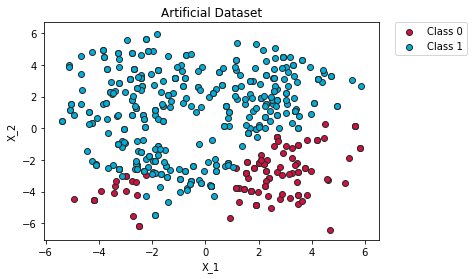

In [12]:
# Creates the Neural Network with 2 Input Neurons, 20 Hidden Neurons and 1 Output Neuron
# (The weights are randomnly initiated)
brain = MultilayerPerceptron(n_neurons=[2,20,1])

# Predicts each sample in the dataset
y_hat = brain.predict(X_train)

# Plot the data using the Network's prediction to color the points
tl.plotData(X_train, y_hat)

We can also classify the entire dataset space in order to visualize the behaviour of the network, and the **decision boundary**:

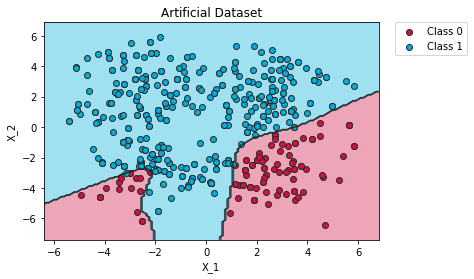

In [13]:
# Classify and plot the results for the entire dataset space
tl.plotClassContour(X_train, y_hat, brain)

### 5. Multiclass Classification Using a MLP

In a lot of applications, the Neural Network has to identify the sample within a set of possible classes (not only the binary case). Fortunately, the Multilayer Perceptron already covers this functionality. This is a representation of a MLP for a multiclass classification:

<img src="../imgs/mlp_02.png" alt="multiclass multilayer perceptron" width="350px"/>

Now the case is that the output layer will have a set of neurons, each representative of a class. The probability accumulated in such neuron is the probability of a certain sample to be part of that class. 

**Consider the Artificial Dataset below, where the color indicates the correct class of each sample**:

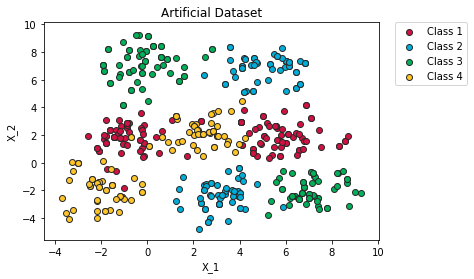

In [14]:
# Loads and Plot the Data
X_train, X_test, y_train, y_test = tl.loadData("../data/toy_data_02.csv")
tl.plotData(X_train, y_train)

We know update (again) the _predict()_ method to also account for the multiclass case. 

In this case, the method return directly the number of the class that the sample belongs, given that the probability of it belonging to such class is the higher among all the neurons in the output layer.

In [15]:
# CLASSIFICATION PREDICTION
def predict(self, X):
    A = self.forward(X)
    
    # Case: Multiclass
    if(self.n_neurons[-1] > 1):
        return A[-1].argmax(axis=0)

    # Case: Singleclass
    else:
        return (A[-1] > 0.5).astype(int)

MultilayerPerceptron.predict = predict

We can now predict all the samples from the artificial dataset using a Neural Network and visualize the results:

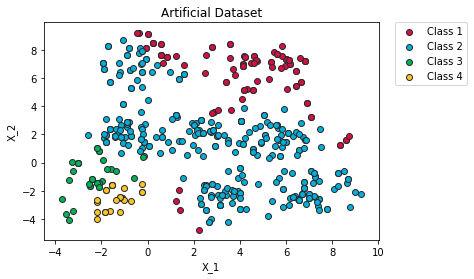

In [23]:
# Creates the Neural Network with 2 Input Neurons, 20 Hidden Neurons and 1 Output Neuron
# (The weights are randomnly initiated)
brain = MultilayerPerceptron(n_neurons=[2,20,4])

# Predicts each sample in the dataset
y_hat = brain.predict(X_train)

# Formatting the output to the One-Hot Enconding format
y_hat_ohe = np.zeros([4, y_hat.shape[0]]);
for i in range(0, y_hat.shape[0]):
    y_hat_ohe[y_hat[i],i] = 1

# Plot the data using the Network's prediction to color the points
tl.plotData(X_train, y_hat_ohe)

We can also classify the entire dataset space in order to visualize the behaviour of the network, and the **decision boundary**:

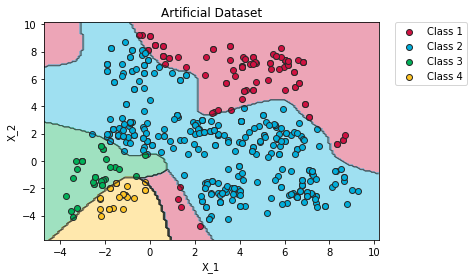

In [24]:
# Classify and plot the results for the entire dataset space
tl.plotClassContour(X_train, y_hat_ohe, brain)

---